# Hausaufgabe 5
## Schallerzeugung durch einen umströmten Zylinder (Teil 2)
<!-- Lizensiert unter (CC BY 2.0) Gert Herold, 2020 -->

Bei der Umströmung eines zylindrischen Körpers bilden sich hinter diesem häufig Wirbelstraßen aus.
Je nach Medium, Strömungsgeschwindigkeit und Durchmesser des Zylinders können die gegenläufigen Wirbel wahrnehmbare Töne verursachen.

Zusätzlich zu dem in Hausaufgabe 4 ausgewerteten Messungen wurde die Schallabstrahlung von 9 Zylindern unterschiedlichen Durchmessers bei 13 verschiedenen Strömungsgeschwindigkeiten gemessen und der jeweilige Hiebton bestimmt.
Die Ergebnisse sind in tabellarischer Form in der Datei `vf.csv` eingetragen.

**1) Laden Sie die detektierten Hiebtöne aus der Datei `vf.csv` und visualisieren Sie die Daten.**
  * Stellen Sie in Abb. 1 den Verlauf der Frequenzen über der Strömungsgeschwindigkeit für jeden Durchmesser dar. Zeichnen Sie in dieselbe Abbildungen die gefundenen Hiebtöne aus der letzten HA ein.
  * Stellen Sie in Abb. 2 den Verlauf der Frequenzen über dem Zylinderdurchmesser für jede Strömungsgeschwindigkeit dar.  
  * Stellen Sie in Abb. 3 die Abhängigkeit der Frequenz von sowohl der Strömungsgeschwindigkeit als auch des Zylinderdurchmessers dar (z.B. über einen Konturplot)
  * Fügen Sie jeweils eine aussagekräftige Legende bzw. Farbskala hinzu und achten Sie auf korrekte Achsenbeschriftungen.
  * *Zusatzaufgabe: Lesen Sie neben den Frequenzen auch die Durchmesser-Werte automatisiert ein, anstelle sie per Hand einzugeben.*

C:\Users\Fabio\Desktop\Python\HA5
C:\Users\Fabio\Desktop\Python\HA5
(13, 10)


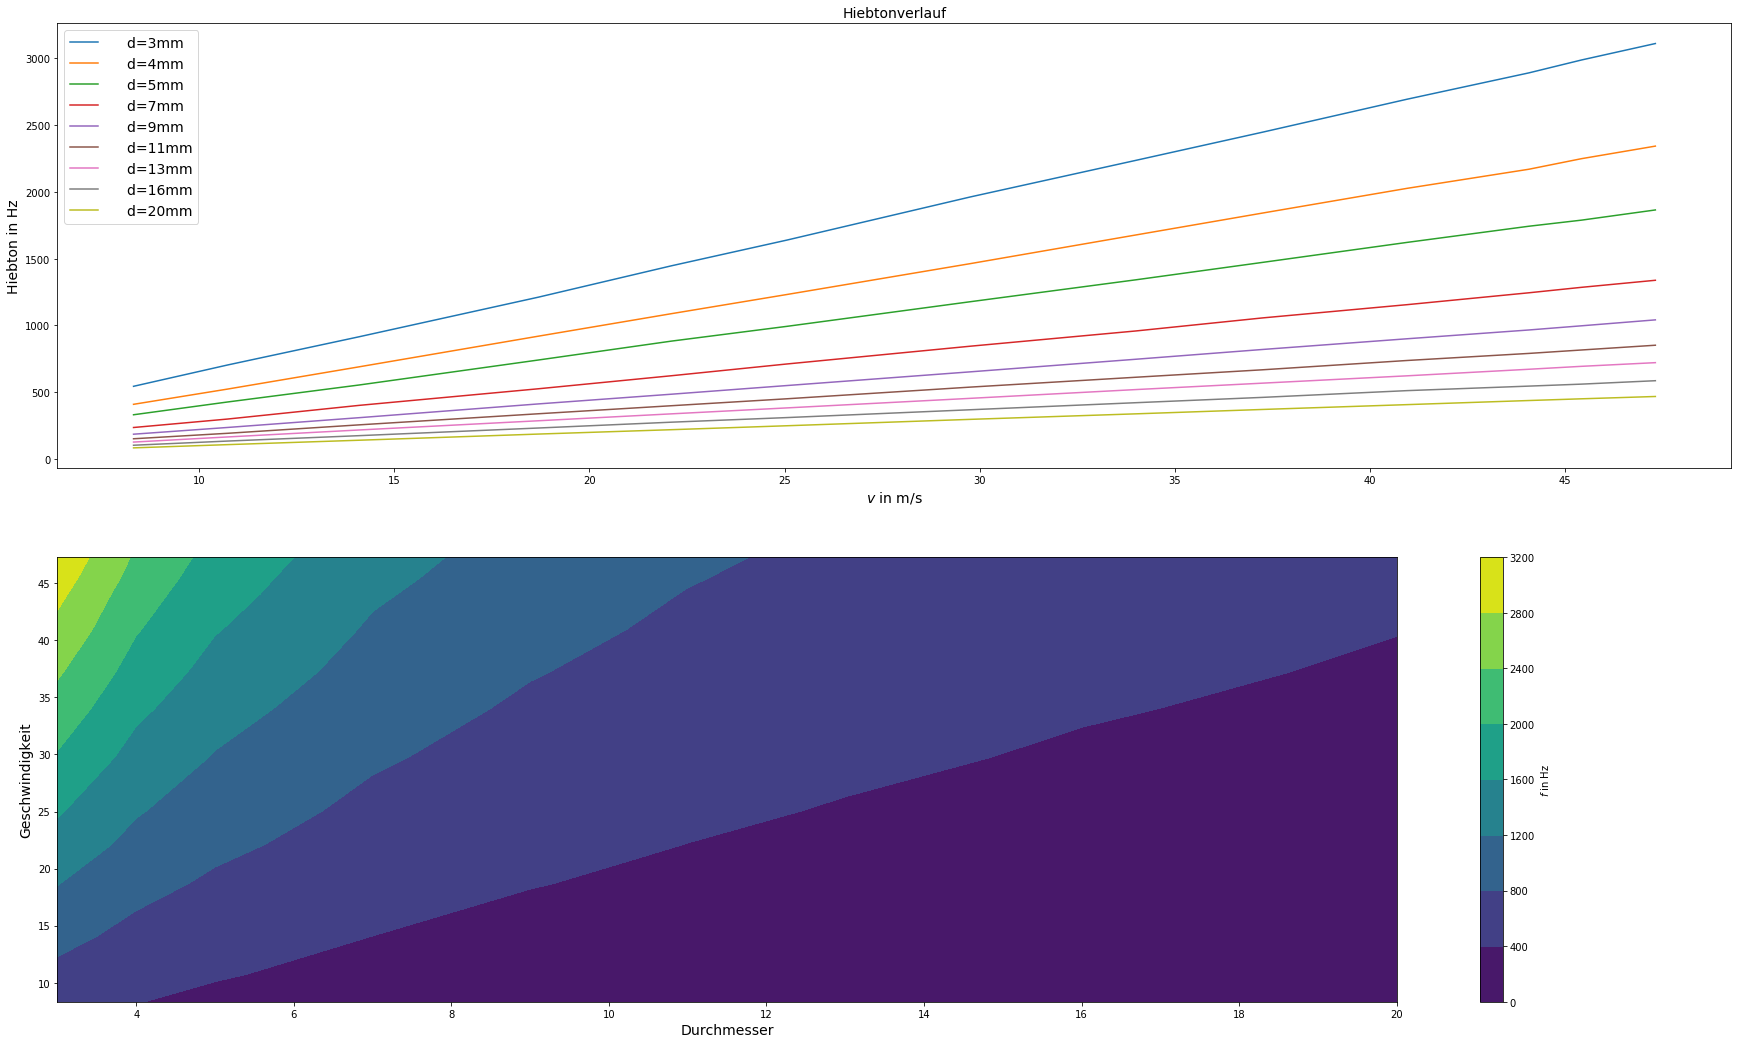

In [25]:
import os
import numpy as np
import csv
import matplotlib.pyplot as plt

print(os.getcwd())

os.chdir(r"C:\Users\Fabio\Desktop\Python\HA5")
print(os.getcwd())


with open('vf.csv') as file:
    next(file)
    reader = csv.DictReader(file)
           
    Zeile=0
    for row in reader:
        if Zeile == 0:
            KEYS=list(row.keys())
            ValueMatrix = np.zeros((13,len(KEYS)), dtype=float)
        
        for Spalte in range(0, len(KEYS)):
            ValueMatrix[Zeile,Spalte] = np.array(row[KEYS[Spalte]])
            
        Zeile += 1
        
v=ValueMatrix[0:,0]
d=KEYS[1:]

for i,keys in enumerate(KEYS[1:]):
    d[i] = keys[6:8]
    d[i] = int( d[i].replace('m',''))

print(ValueMatrix.shape)

plt.figure(1, figsize=(30, 18)) 
ax1 = plt.subplot(2,1,1)   

for i in range(1,len(KEYS)):
    plt.plot(ValueMatrix[:,0], ValueMatrix[:,i], label=KEYS[i])
    
plt.title('Hiebtonverlauf', fontsize=14)
plt.xlabel("$v$ in m/s", fontsize=14);
plt.ylabel('Hiebton in Hz', fontsize=14);    
plt.legend(loc='upper left', fontsize=14)

X=np.array(KEYS[1:])
Y= np.array(ValueMatrix[:,0])
TheData= ValueMatrix[0:,1:]


ax2 = plt.subplot(2,1,2)
plt.contourf(d,v,TheData) 
plt.colorbar(shrink=1, label="$f$ in Hz")

plt.xlabel('Durchmesser', fontsize=14);
plt.ylabel('Geschwindigkeit', fontsize=14);

plt.show()


Die Frequenz des Hiebtons hängt mindestens von den zwei Größen Durchmesser und Geschwindigkeit ab:
$$
f = f(d,v)
$$
Die Abhängigkeit von $v$ (Abb. 1) wurde in HA 4 mittels der Regressionsgerade gefunden. 
Die Abhängigkeit von $d$ (Abb. 2) könnte nach demselben Schema geschehen, allerdings trifft die Annahme einer direkt linearen Abhängigkeit offensichtlich nicht zu.
Außerdem wäre es wünschenswert, beide Parameter einer einzigen Berechnungsformel übergeben zu können.

Im einfachsten Fall mit nur linearen Abhängigkeiten könnten wir schreiben:
$$
f(d,v) = \beta_0 + \beta_1\,d + \beta_2\,v + \epsilon
$$
Die Koeffizienten $\beta_n$ erfüllen denselben Zweck wie $a$ und $b$ aus HA 4. 
$\epsilon$ ist eine Störgröße, die als zufällig angenommen wird und die den Fehler beschreibt, den das Modell z.B. durch unbeobachtbare Abhängigkeiten macht.
Die Lösung eines Problems mithilfe einer solchen Formulierung geschieht über die [multiple lineare Regression](https://de.wikipedia.org/wiki/Multiple_lineare_Regression).

Nichtlineare Abhängigkeiten können mit diesem Schema auch untersucht werden, sofern eine Annahme zur Art der Nichtlinearität getroffen wird, z.B.:
$$
f(d,v) = \beta_1\,d + \beta_2\,v + \beta_3\,d^2 + \ldots + \beta_4\,\frac{d}{v} + \beta_5\,\frac{v}{d} + \ldots + \beta_6\,\sin(v^\sqrt{d}) + \ldots +  \epsilon
$$
Das Modell kann dabei beliebig komplex werden.
Allgemein können wir auch schreiben:
$$
f = \pmb{x} \cdot \pmb{\beta} + \epsilon~,
$$
wobei der Vektor $\pmb{x}$ die charakteristischen Größen wie $d$, $v$ oder daraus abgeleitete Terme enthält (im maschinellen Lernen wird hier auch von *Features* gesprochen) und $\pmb{\beta}$ die zunächst noch unbekannten Koeffizienten.

Natürlich sollen unsere Messdaten (gekennzeichnet mit Tilde $\tilde{}$) durch das Modell beschreibbar sein, sodass gilt:
$$
\tilde{f}_i = \pmb{x}_i \cdot \pmb{\beta} + \epsilon_i
$$
bzw. wenn wir die Vektoren $\pmb{x}_i$ als Zeilen in eine Matrix $\pmb{X}$ schreiben:
$$
\pmb{\tilde{f}}  = \pmb{X} \cdot \pmb{\beta} + \pmb{\epsilon}~.
$$
In die Form dieser Gleichung wollen wir nun unsere Größen bringen.

**2) Erstellen Sie aus den Strömungsgeschwindigkeiten und Zylinderdurchmessern eine Modellmatrix $\pmb{X}$ und aus den zugehörigen Frequenzen den Messvektor $\pmb{\tilde{f}}$.**
  * Für die Generierung von $\pmb{X}$ muss bereits ein Modell angenommen werden. Verwenden Sie zunächst $\tilde{f}_i = \beta_0\cdot 1 + \beta_1\cdot d_i + \beta_2\cdot v_i + \epsilon_i$. Das Modell soll jedoch später leicht ausgetauscht werden können.
  * Geben Sie die Dimensionen der beiden erstellten Größen aus.
  * Plotten Sie zur Überprüfung die Spalten der Matrix $\pmb{X}$ über $\pmb{\tilde{f}}$.
 
*Hinweis: Der unbekannte Fehler $\epsilon_i$ ist immer implizit enthalten und muss hier nicht über eine eigene Variable "mitmodelliert" werden.*

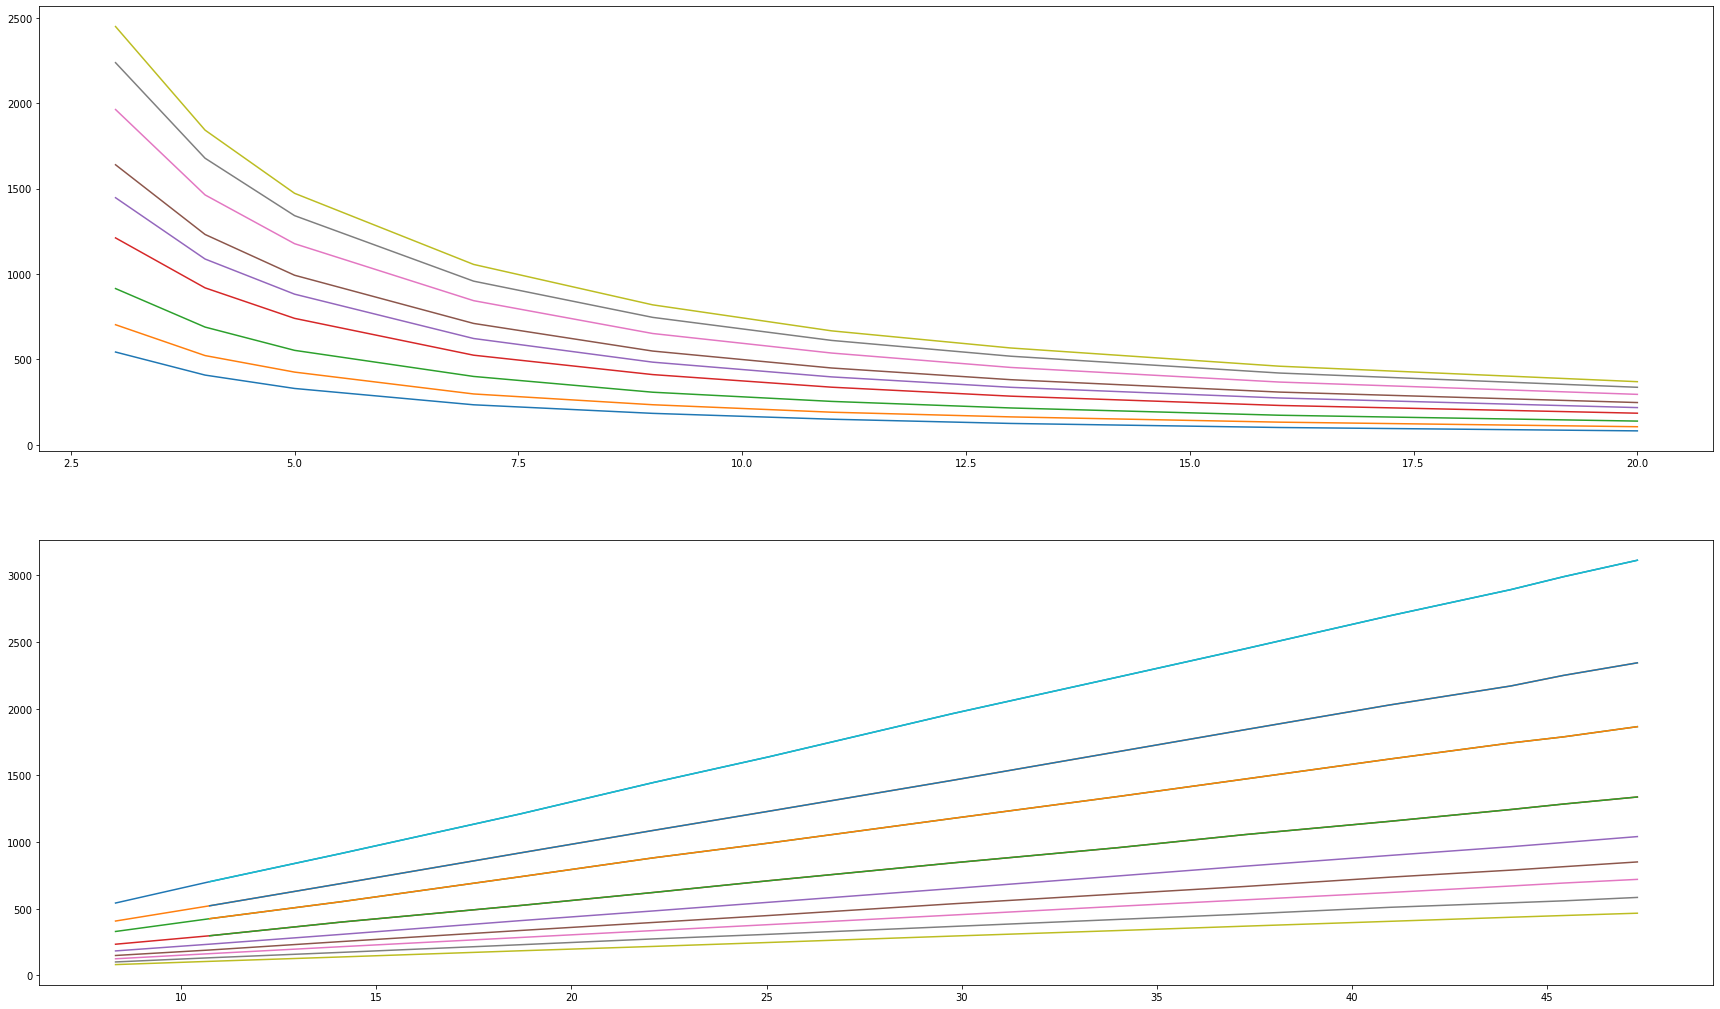

In [26]:
ft=np.reshape(ValueMatrix[0:,1:],[len(v)*len(d),1])

X=np.zeros([len(v)*len(d),3])
for i in range(0,len(d)):
    for j in range(0,len(v)):
        X[i+j*len(d),0] =  1
        X[i+j*len(d),1] =  d[i]
        X[i+j*len(d),2] =  v[j]
        
plt.figure(1, figsize=(30, 18)) 
plt.subplot(2,1,1)
for i in range(0,len(d)):
    plt.plot(X[i*len(d):(i+1) * len(d),1],ft[i*len(d):(i+1) * len(d)])
    
    
plt.subplot(2,1,2)
for i in range(0,len(v)):
    plot_X=X[i::len(d), 2]
    plot_ft=ft[i::len(d)]
    plt.plot(plot_X, plot_ft)
#plt.plot(X[:,1], ft)


Angenommen, es existiert ein Modell für $f(d,v)$ mit bekannten Koeffizienten $\beta_i$, so kann dessen Güte anhand der Abweichungen von mit dem Modell berechneten zu den gemessenen Daten bewertet werden.
Diese Abweichungen werden häufig mithilfe der Summe der Fehlerquadrate (normiert mit der Anzahl der Messpunkte $N$) quantifiziert:
$$
\frac{1}{N}\sum_{i=1}^{N}(f(d_i,v_i) - \tilde{f}_i)^2 = \frac{1}{N}\| \pmb{f} - \pmb{\tilde{f}} \|_2^2
$$
Dieses Fehlermaß gilt es zu minimieren, um ein Modell möglichst genau an die Messdaten anzunähern.
Es wird daher auch als Kosten- oder Verlustfunktion bezeichnet.

**3) Schreiben Sie eine Funktion *loss()*, die die normierte Summe der Fehlerquadrate berechnet.** 
  * Die Funktion soll als Parameter übergeben bekommen:
    * einen Koeffizienten-Vektor `beta`
    * eine Modell-Matrix `X`
    * einen Messwerte-Vektor `f_tilde`
  * Rückgabewert soll der berechnete Fehler sein.
  * Testen Sie die Funktion mit dem Beispielmodell und `beta = array([1., 1., 1.])`

<!--
[Multiple lineare Regression](https://de.wikipedia.org/wiki/Multiple_lineare_Regression)
-->

In [27]:
def loss(beta, X, f_tilde):
    
    print('beta', beta)
    
    N = X.shape[0]
    errV =  (X @ beta)  - f_tilde.flatten()
    #test1 = np.reshape( errV, N,1) 
    #test2 = f_tilde.flatten()
    sumErr = 1/N * sum( errV**2 )
    print('sumErr', sumErr)
    return sumErr
    

beta = np.array([1., 1., 1.])    
Err1 = loss(beta, X, ft)   

beta = np.array([816.01579837, -83.7152295,   28.9849574 ])
Err2 = loss(beta, X, ft)   
print('Err1', Err1)
print('Err2', Err2)

beta [1. 1. 1.]
sumErr 1102970.2302854706
beta [816.01579837 -83.7152295   28.9849574 ]
sumErr 117576.15393042674
Err1 1102970.2302854706
Err2 117576.15393042674


Mithilfe eines geeigneten Algorithmus' soll nun der Koeffizientensatz $\pmb{\beta}$ gefunden werden, der obige Kostenfunktion minimiert.
Praktischerweise sind im Modul [*scipy.optimize*](https://docs.scipy.org/doc/scipy/reference/optimize.html) bereits zahlreiche Minimierungsalgorithmen implementiert, die auf das Problem angewendet werden können.

Für den Fall der Mehrfachregression bietet sich die im Modul enthaltene Funktion [*minimize()*](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html) an.
Wichtig sind hier vor allem die ersten drei Parameter, die ihr übergeben werden können:
  * `fun` : die Funktion, deren Ergebnis minimal werden soll (zu übergeben als Objekt _ohne_ Klammern)
  * `x0` : Startwerte für die zu ermittelnden Koeffizienten (als Array zu übergeben)
  * `args`: weitere Argumente, die die Funktion beim Aufruf erwartet (je nach Parameterliste, als Tupel übergeben)

Voraussetzung ist, dass die Argumente der Parameterliste der zu minimierenden Funktion in der Reihenfolge `(x, *args)` erwartet werden, also zunächst die  Koeffizienten, dann weitere Parameter. 
Dies sollte mit der Funktion *loss()* gegeben sein.

Die *minimize()*-Funktion gibt ein [OptimizeResult-Objekt](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.OptimizeResult.html) zurück.
Rufen wir die Funktion mit
```python
result = minimize(...)
```
auf, können z.B. folgende Eigenschaften abgerufen werden:
  * `result.x` : die gefundenen Koeffizienten
  * `result.success` : Boolean, der angibt, ob ein Minimum gefunden wurde
  * `result.nit` : Anzahl der vom Algorithmus durchgeführten Iterationen


**4) Finden Sie ein möglichst simples Modell, dass die Daten möglichst gut beschreibt.**
  * Kopieren Sie benötigten Quellcode aus Aufgabe 2) in die nächste Zelle, um das Modell schnell ändern zu können. Aufgabe 2) soll unverändert bleiben.
  * Minimieren Sie die Kostenfunktion. Wählen Sie als Startwert für jeden der Koeffizienten 1.
  * Suchen Sie Koeffizienten mindestens für folgende Modelle:
    *  $f(d,v) = \beta_0 + \beta_1\,d + \beta_2\,v + \epsilon$ 
    *  $f(d,v) = \beta_0 + \beta_1\,d + \beta_2\,v + \beta_3\,\frac{1}{d^2} + \beta_4\,\frac{1}{v^2} + \epsilon$ 
    *  $f(d,v) = \beta_1\,\frac{v}{d}  + \beta_2\,\frac{v^3}{d^3} + \beta_3\,\frac{v^5}{d^5}  + \epsilon$
  * Geben Sie die Anzahl der Iterationen, den berechneten Koeffizientensatz und für diesen den Wert der Kostenfunktion aus. Geben Sie außerdem an, ob der Algorithmus das Minimum eindeutig gefunden hat.
  * Falls die Minimierung nicht erfolgreich/eindeutig war, versuchen Sie, das Modell zu ändern. Möglicherweise führt auch eine Vereinfachung zum Erfolg.
  * Plotten Sie jeweils das gemessene $\pmb{\tilde{f}}$ und das sich aus dem Modell ergebende $\pmb{f}$ in dasselbe Diagramm, um die Abweichung einschätzen zu können.

In [29]:
# Linearer Ansatz
from scipy.optimize import minimize
#f_tilde=ft
#X_ft = zip (X,f_tilde)
x0 = np.array( [1., 1., 1.] )
result = minimize(loss, x0, args=(X,ft))



beta [1. 1. 1.]
sumErr 1102970.2302854706
beta [1.00000001 1.         1.        ]
sumErr 1102970.2302616318
beta [1.         1.00000001 1.        ]
sumErr 1102970.2301268766
beta [1.         1.         1.00000001]
sumErr 1102970.2294502524
beta [1. 1. 1.]
sumErr 1102970.2302854706
beta [1.02831028 1.18834145 1.99188005]
sumErr 1046436.2254568319
beta [1.02831028 1.18834145 1.99188005]
sumErr 1046436.2254568319
beta [1.02831029 1.18834145 1.99188005]
sumErr 1046436.2254339084
beta [1.02831028 1.18834147 1.99188005]
sumErr 1046436.2253073478
beta [1.02831028 1.18834145 1.99188006]
sumErr 1046436.2246532453
beta [1.14155139 1.94170725 5.95940023]
sumErr 842523.6496249228
beta [1.14155139 1.94170725 5.95940023]
sumErr 842523.6496249228
beta [1.14155141 1.94170725 5.95940023]
sumErr 842523.6496056576
beta [1.14155139 1.94170727 5.95940023]
sumErr 842523.649511876
beta [1.14155139 1.94170725 5.95940025]
sumErr 842523.6489478593
beta [  1.53775795 -90.4613265   32.95503695]
sumErr 706952.5377

In [30]:
# lin + 1/quad
from scipy.optimize import minimize

x0 = np.array( [1., 1., 1., 1., 1.] )


X=np.zeros([len(v)*len(d),5])
for i in range(0,len(d)):
    for j in range(0,len(v)):
        #print('i:',i)
        ##print('j:',j)
        #X[i*len(v)+j,0] =  d[i]
        #X[i*len(v)+j,1] =  v[j]
        
        X[i+j*len(d),0] =  1
        X[i+j*len(d),1] =  d[i]
        X[i+j*len(d),2] =  v[j]
        X[i+j*len(d),3] =  1 / ( d[i] **2 )
        X[i+j*len(d),4] =  1 / ( v[j] **2 )
        
minimize(loss, x0, args=(X,ft))        

beta [1. 1. 1. 1. 1.]
sumErr 1102885.1118458689
beta [1.00000001 1.         1.         1.         1.        ]
sumErr 1102885.1118220314
beta [1.         1.00000001 1.         1.         1.        ]
sumErr 1102885.11168728
beta [1.         1.         1.00000001 1.         1.        ]
sumErr 1102885.1110106783
beta [1.         1.         1.         1.00000001 1.        ]
sumErr 1102885.1118446377
beta [1.         1.         1.         1.         1.00000001]
sumErr 1102885.111845831
beta [1. 1. 1. 1. 1.]
sumErr 1102885.1118458689
beta [1.02830953 1.18834142 1.991879   1.00146219 1.00004507]
sumErr 1046352.9169133907
beta [1.02830953 1.18834142 1.991879   1.00146219 1.00004507]
sumErr 1046352.9169133907
beta [1.02830954 1.18834142 1.991879   1.00146219 1.00004507]
sumErr 1046352.9168904681
beta [1.02830953 1.18834143 1.991879   1.00146219 1.00004507]
sumErr 1046352.9167639117
beta [1.02830953 1.18834142 1.99187901 1.00146219 1.00004507]
sumErr 1046352.9161098304
beta [1.02830953 1.18834142

      fun: 56843.37526436132
 hess_inv: array([[ 7.41386652e+00, -3.52377264e-01, -7.81220048e-02,
        -4.12145225e+01,  8.77554165e-02],
       [-3.52377264e-01,  2.77216233e-02,  3.15661432e-04,
         2.12955497e+00, -4.02352305e-03],
       [-7.81220048e-02,  3.15661432e-04,  3.11510006e-03,
        -6.99594923e-02, -8.13749170e-04],
       [-4.12145225e+01,  2.12955497e+00, -6.99594923e-02,
         5.02522233e+02, -4.52032091e-01],
       [ 8.77554165e-02, -4.02352305e-03, -8.13749170e-04,
        -4.52032091e-01,  1.00021170e+00]])
      jac: array([-0.00732422, -0.12109375, -0.34472656,  0.00048828,  0.        ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 838
      nit: 25
     njev: 118
   status: 2
  success: False
        x: array([-5.13190861e+01, -2.90687645e+01,  2.89848760e+01,  1.12270529e+04,
        2.39236415e-01])

In [31]:
# v/d ** N  N = 1,3,5
from scipy.optimize import minimize

x0 = np.array( [1., 1., 1., 1.] )


X=np.zeros([len(v)*len(d), x0.size])
for i in range(0,len(d)):
    for j in range(0,len(v)):
              
        #X[i+j*len(d),0] =  0
        X[i+j*len(d),0] =  v[j]/d[i]
        X[i+j*len(d),1] =  (v[j]/d[i])**3
        X[i+j*len(d),2] =  (v[j]/d[i])**5
        X[i+j*len(d),3] =  1
        
        
result = minimize(loss, x0, args=(X,ft))   
best_x = result.x

beta [1. 1. 1. 1.]
sumErr 21885958718.69346
beta [1.00000001 1.         1.         1.        ]
sumErr 21885958718.70946
beta [1.         1.00000001 1.         1.        ]
sumErr 21885958721.802345
beta [1.         1.         1.00000001 1.        ]
sumErr 21885959370.98024
beta [1.         1.         1.         1.00000001]
sumErr 21885958718.69465
beta [1. 1. 1. 1.]
sumErr 21885958718.69346
beta [ 0.99997522  0.99518626 -0.00998853  0.99999816]
sumErr 2637225.0776028614
beta [ 0.99997522  0.99518626 -0.00998853  0.99999816]
sumErr 2637225.0776028614
beta [ 0.99997524  0.99518626 -0.00998853  0.99999816]
sumErr 2637225.0773633546
beta [ 0.99997522  0.99518627 -0.00998853  0.99999816]
sumErr 2637225.0433350084
beta [ 0.99997522  0.99518626 -0.00998851  0.99999816]
sumErr 2637218.500137242
beta [ 0.99997522  0.99518626 -0.00998853  0.99999817]
sumErr 2637225.077574398
beta [  5192.56854285 193916.17906955   -925.21485649   1094.72031161]
sumErr 1575971958183924.0
beta [  5192.56854285 1939

**5) Wenden Sie die das Modell an.**
  * Wie hoch ist die Hiebton-Frequenz bei einem Zylinderdurchmesser von 10 mm und einer Strömungsgeschwindigkeit von 20 m/s?
  * Wie groß ist der Durchmesser eines Zylinders, der bei 42 m/s Windgeschwindigkeit mit 1000 Hz pfeift?
  * Wie groß ist die Strömungsgeschwindigkeit, wenn ein Zylinder mit 30 mm Durchmesser einen Ton bei 300 Hz verursacht?

In [32]:
from scipy.optimize import fsolve
print(best_x)

def getFreq(v,d,best_x): 
    v_d=v/d
    # Hiebtonfrequenz berechnen
    H_T = v_d * best_x[0] + v_d**3 * best_x[1] + v_d**5 * best_x[2] + best_x[3]
    return H_T

#def f_d(x,v,freq):
    f = v * best_x[0] / x + v**3 * best_x[1] / (x**3) + v**5 * best_x[2] / (x**5) + best_x[3]-freq
    
def f_d(x):
    d_s = abs (vel * best_x[0] / x + vel**3 * best_x[1] / (x**3) + vel**5 * best_x[2] / (x**5) + best_x[3] - Freq )
    return d_s

def f_v(x):
    v_s = abs (x * best_x[0] / d + x**3 * best_x[1] / (d**3) + x**5 * best_x[2] / (d**5) + best_x[3] - Freq )
    return v_s

def getDiam(v,f_d,best_x): 
    
    d_s = fsolve(f_d, 100)
    return d_s

# Wie hoch ist die Hiebton-Frequenz bei einem  von 10 mm und einer Strömungsgeschwindigkeit von 20 m/s?
# berechnen von v/d
v=20
d=10
H_T = getFreq(v , d, best_x)
print('Die Hiebtonfrequenz für eine Anströmgeschwindigkeit von {} m/s und einem Durchmesser von {} mm beträgt {:.2f} Hz'.format(v, d, H_T))

# Wie groß ist der Durchmesser eines Zylinders, der bei 42 m/s Windgeschwindigkeit mit 1000 Hz pfeift?
#d_An = getDiam(42, 1000, best_x)
Freq=1000
vel=42
d_s = fsolve(f_d,5)

print('Der Durchmesser für eine Hiebtonfrequenz von {} Hz und einer Anströmgeschwindigkeit von {} m/s beträgt {:.2f} mm'.format( Freq , vel , d_s[0]))



# Wie groß ist die Strömungsgeschwindigkeit, wenn ein Zylinder mit 30 mm Durchmesser einen Ton bei 300 Hz verursacht?
d=30
Freq=300
v_s = fsolve(f_v,10)

print('Die Geschwindigkeit für eine Frequenz von {} Hz und einem Durchmesser von {} mm beträgt {:.2f} m/s'.format(Freq, d, v_s[0]))

[ 1.96972941e+02  5.58170928e-03 -1.93362241e-05  9.25400554e-01]
Die Hiebtonfrequenz für eine Anströmgeschwindigkeit von 20 m/s und einem Durchmesser von 10 mm beträgt 394.92 Hz
Der Durchmesser für eine Hiebtonfrequenz von 1000 Hz und einer Anströmgeschwindigkeit von 42 m/s beträgt 8.29 mm
Die Geschwindigkeit für eine Frequenz von 300 Hz und einem Durchmesser von 30 mm beträgt 45.55 m/s
